# Python notebooks per il corso di Sperimentazioni di Fisica II

## Come usare questo notebook

Il notebook è eseguibile in due modi:

1. online, su [Binder](https://mybinder.org/v2/gh/gipert/notebooks/master?filepath=chi-square-analysis-RLC.ipynb)

2. sul proprio laptop, installando il software necessario:
   - installa IPython e Jupyter:
     - con [conda](https://www.anaconda.com/download):
     ```
     conda install ipython jupyter
     ```
     - con pip:
     ```
     pip install --upgrade pip # first, always upgrade pip!
     pip install --upgrade ipython jupyter
     ```
   - lancia il notebook:
     ```
     git clone https://github.com/gipert/notebooks
     cd notebooks
     jupyter notebook chi-square-analysis-RLC.ipynb
     ```

## Fit della curva di risonanza del circuito RLC con `scipy`

Per prima cosa importo pacchetti e funzioni che utilizzerò in seguito. [`numpy`](https://www.numpy.org/devdocs/user/quickstart.html) è un framework per la computazione scientifica in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

Creo degli array contenenti i dati di frequenze e voltaggio ai capi della resistenza (con errori) raccolti in laboratorio e ne faccio un grafico con [`matplotlib`](https://matplotlib.org/tutorials/index.html)

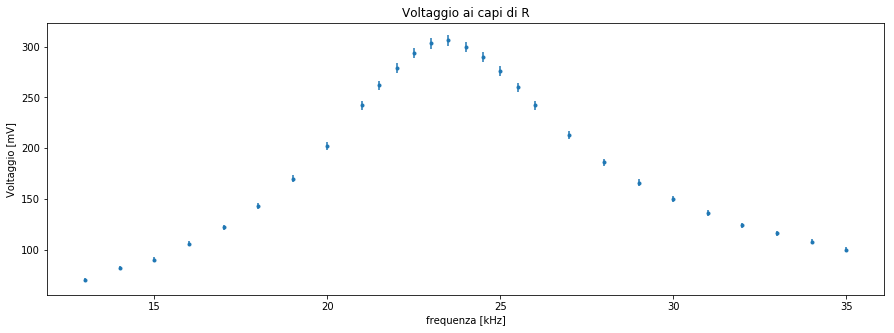

In [94]:
from numpy import sqrt

f_kHz = np.array([13, 14, 15, 16, 17, 18, 19, 20, 
     21, 21.5, 22, 22.5, 23, 23.5, 24, 
     24.5, 25, 25.5, 26, 27, 28, 29, 
     30, 31, 32, 33, 34, 35])
V_mV = np.array([70, 82, 90, 106, 122, 143, 170, 202,
     242, 262, 279, 294, 303, 306, 300, 290,
     276, 260, 242, 213, 186, 166, 150, 136,
     124, 116, 108, 100])

# gli errori sono calcolati assumendo un fondo scala di 50 mV
σ_V = np.array([sqrt((0.04*50)**2 + (0.015*v)**2) for v in V_mV])

plt.rcParams['figure.figsize'] = [15, 5] 
plt.errorbar(f_kHz, V_mV, yerr=σ_V, fmt='.')
plt.title("Voltaggio ai capi di R")
plt.xlabel("frequenza [kHz]")
plt.ylabel("Voltaggio [mV]");

Definisco la funzione di fit (Breit-Wigner)

In [87]:
from numpy import pi

def fitfunc(f, A, R, L, C): # le frequenze 'f' sono in kHz
    ω = 2*pi*f*1E03; # conversione in secondi
    Δ = R/(2*L)
    Ω = 1/sqrt(L*C)
    return A*ω/sqrt(ω**4-2*ω**2*(Ω**2-2*Δ**2)+Ω**4)

Definisco dei valori iniziali per i parametri di fit e minimizzo il χ2 con [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). È importante scegliere dei valori iniziali vicini al minimo globale, o si corre il rischio di incappare in un minimo locale.

In [93]:
p_init = [12E6, 84, 2.2E-3, 21E-9]

p_best, cov = optimize.curve_fit(
    fitfunc, f_kHz, V_mV,          # assegno funzione di fit, ascisse e ordinate
    sigma=σ_V,                     # assegno gli errori sulle ordinate
    p0=p_init, bounds=(0, +np.inf) # imposto i valori iniziali dei parametri e
)                                  # intervalli ammessi [0, +∞)                            

Stampo i parametri di "best fit" su schermo e faccio un grafico della curva corrispondente

---------------------------
Best fit values:
---------------------------
A = 12750001.705699679
R = 92.10709653253815 Ω
L = 0.0021940027696048256 H
C = 2.113492538511421e-08 F
---------------------------


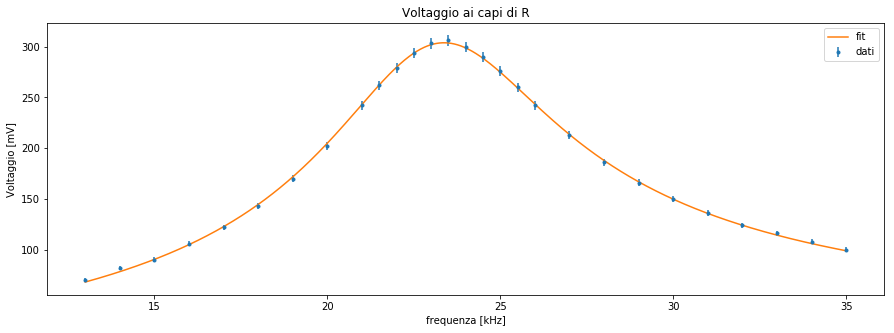

In [96]:
print("---------------------------")
print("Best fit values:")
print("---------------------------")
print("A =", p_best[0])
print("R =", p_best[1], "Ω")
print("L =", p_best[2], "H")
print("C =", p_best[3], "F")
print("---------------------------")

plt.errorbar(f_kHz, V_mV, yerr=σ_V, fmt='.', label='dati')
_pts = np.linspace(f_kHz[0], f_kHz[-1], 1000)
plt.plot(_pts, fitfunc(_pts, *p_best), label='fit')
plt.title("Voltaggio ai capi di R")
plt.xlabel("frequenza [kHz]")
plt.ylabel("Voltaggio [mV]")
plt.legend();